# Linear Regression

## 농어의 길이 / 무게 데이터
from https://bit.ly/perch_data

In [7]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1, 1)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)

knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print(knr.predict([[50]]))

[1033.33333333]


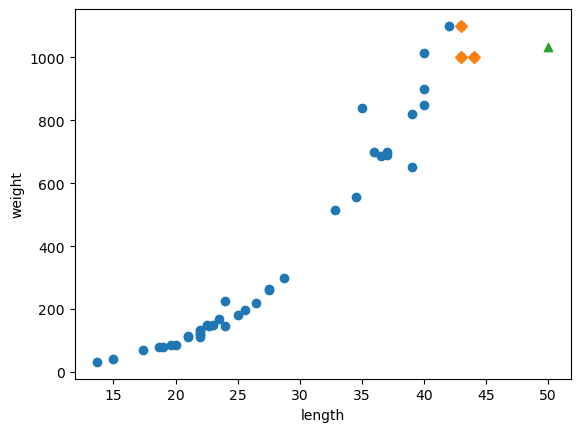

In [33]:
import matplotlib.pyplot as plt

# 훈련데이터
plt.scatter(train_input, train_target)

# 예측데이터와의 최근접 데이터
distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

#예측 데이터(50cm농어)
plt.scatter(50,knr.predict([[50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

1차곡선이 아닌 2차곡선의 상관관계를 가지므로 예측이 잘못된 것을 알 수 있음

따라서 KNN회귀가 아닌 선형회귀 알고리즘 채택

## 단순 선형회귀

y = ax + b 꼴의 식에서 적절한 a와 b를 찾아 회귀선을 그린다. 
과소적합의 가능성이 크다

In [39]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input,train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [48]:
# 각각 a = 기울기(coefficient), b = 절편(intercept)를 나타냄
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


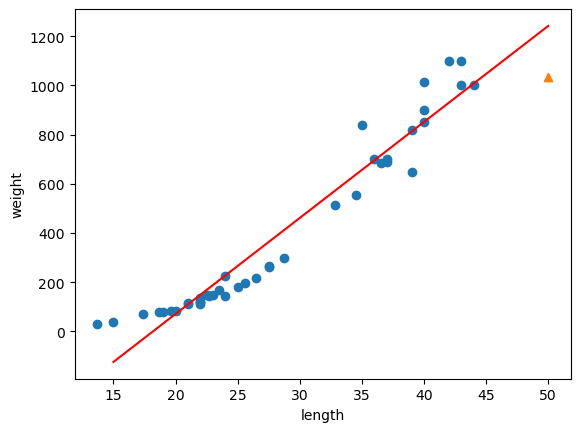

In [52]:
# 15에서 50까지의 1차 방정식 그래프
plt.plot([15,50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ + lr.intercept_], color = 'red')

# 훈련데이터
plt.scatter(train_input, train_target)

#예측 데이터(50cm농어)
plt.scatter(50,knr.predict([[50]]), marker='^')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [54]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다중선형회귀

In [60]:
train_poly = np.column_stack((train_input**2, train_input)) #tuple형태로 입력받음
test_poly = np.column_stack((test_input**2, test_input))

print(train_poly)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]
 [ 625.     25.  ]
 [1600.     40.  ]
 [1521.     39.  ]
 [1849.     43.  ]
 [ 484.     22.  ]
 [ 400.     20.  ]
 [ 484.     22.  ]
 [ 576.     24.  ]
 [ 756.25   27.5 ]
 [1849.     43.  ]
 [1600.     40.  ]
 [ 576.     24.  ]
 [ 441.     21.  ]
 [ 756.25   27.5 ]
 [1600.     40.  ]
 [1075.84   32.8 ]
 [ 702.25   26.5 ]
 [1332.25   36.5 ]
 [ 187.69   13.7 ]
 [ 515.29   22.7 ]
 [ 225.     15.  ]
 [1369.     37.  ]
 [1225.     35.  ]
 [ 823.69   28.7 ]
 [ 552.25   23.5 ]
 [1521.     39.  ]
 [ 441.     21.  ]
 [ 529.     23.  ]
 [ 484.     22.  ]
 [1936.     44.  ]
 [ 506.25   22.5 ]
 [ 361.     19.  ]
 [1369.     37.  ]
 [ 484.     22.  ]
 [ 655.36   25.6 ]
 [1764.     42.  ]
 [1190.25   34.5 ]]


In [64]:
lr2 = LinearRegression()
lr2.fit(train_poly, train_target)

print(lr2.predict([[50**2,50]]))

[1573.98423528]


In [66]:
print(lr2.coef_, lr2.intercept_)
#ax^2 + bx + c 에서 각각 [a, b] ,c

[  1.01433211 -21.55792498] 116.05021078278259


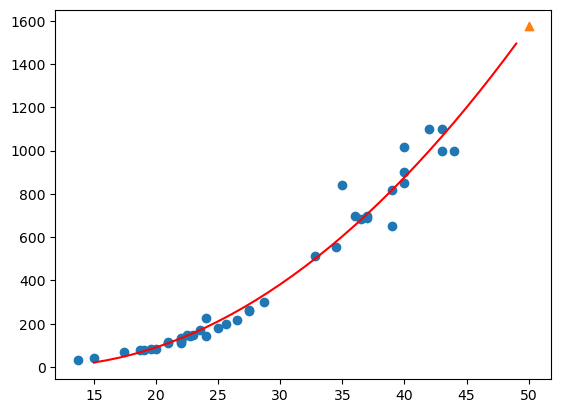

In [83]:
point = np.arange(15,50)

plt.scatter(train_input, train_target)
plt.plot(point, lr2.coef_[0] * point**2 + lr2.coef_[1] * point + lr2.intercept_, color = 'r')
plt.scatter(50, 1574, marker='^')

In [85]:
print(lr2.score(train_poly, train_target))
print(lr2.score(test_poly, test_target))

0.9706807451768623
0.9775935108325121
